# Contents
1. <a href="#Spatial-Resolution:-Sub-and-Over-Sampling">Spatial Resolution</a>
2. <a href="#Log-Intensity-Transformation">Log-Intensity Transformation</a>
3. <a href="#Power-Law-(Gamma)-Transformation">Power Law (Gamma) Transformation</a>
4. <a href="#Contrast-Stretching">Contrast Stretching</a>
5. <a href="#Bit-Plane-Slicing-and-Intensity-Level-Slicing">Bit-Plane Slicing and Intensity-Level Slicing</a>
6. <a href="#Image-Histogram-Equalization-(Both-Multi-and-Single-Channel-Images)">Image Histogram Equalization</a>

# Spatial Resolution: Sub and Over-Sampling

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

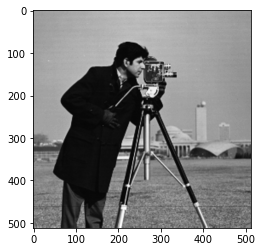

In [2]:
img=data.camera()
h,w=img.shape
plt.imshow(img, 'gray')
Image.fromarray(img).save('camera('+str(h)+'x'+str(w)+').jpg')
# Image saved to storage

# Sub-Sampling
Means resizing to smaller size image

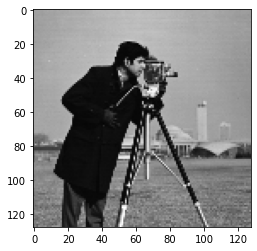

In [3]:
height, width=img.shape
th=4
height=int(height/th)
width=int(width/th)
imgNew=np.ndarray((height, width), dtype=np.uint8)
for i in range(0,height):
    for j in range(0,width):
        imgNew[i][j]=img[i*th][j*th]
plt.imshow(imgNew, 'gray')
Image.fromarray(imgNew).save('camera_sub-sampled('+str(width)+'x'+str(height)+').jpg')
# Image saved to storage

# Over-Sampling:
Resizing image to larger size

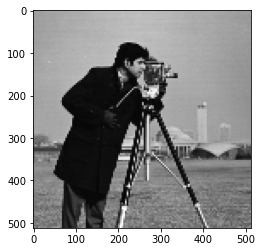

In [4]:
h,w=imgNew.shape
old_h=h
old_w=w
th=4
h=h*th
w=w*th
imgNew2=np.ndarray((h,w),dtype=np.uint8)
for i in range(0,h):
    for j in range(0,w):
        imgNew2[i][j]=imgNew[int(i/th)][int(j/th)]
plt.imshow(imgNew2, 'gray')
imfile=Image.fromarray(imgNew2)
imfile.save('camera_over-sampled from ('+str(old_w)+'x'+str(old_h)+') to ('+str(h)+'x'+str(w)+').jpg')
# Image saved to storage

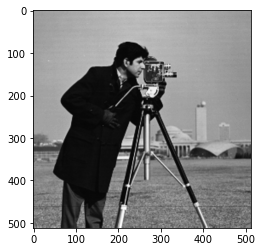

In [5]:
img=data.camera()
plt.imshow(img, 'gray')

## Log Intensity Transformation

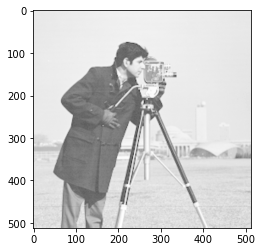

In [6]:
c = 255/(np.log(1 + np.max(img)))
img=data.camera()
height, width=img.shape
for i in range(0,height):
    for j in range(0,width):
        img[i][j]=c*np.log(1+img[i][j])
plt.imshow(img, 'gray')
Image.fromarray(img).save('LogTransformed.jpg')
# Image saved to storage

## Power-Law (Gamma) Transformation
Source: https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/

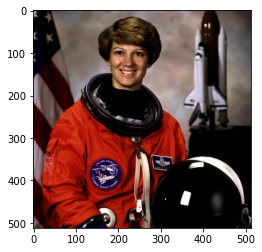

In [7]:
gamma=2.5
img=data.astronaut()
img=np.array(255*(img/255)**gamma, dtype='uint8')
plt.imshow(img)
Image.fromarray(data.astronaut()).save('GammaCorrected_Before.jpg')
# Image saved to storage
Image.fromarray(img).save('GammaCorrected_After.jpg')
# Image saved to storage

# Contrast Stretching

In [8]:
def contrast_stretch(r1,s1,r2,s2, px):
    if px>=0 and px<r1:
        return (s1/r1)*px
    elif px>=r1 and px<r2:
        return ((s2-s1)/(r2-r1)*px-r1)+s1
    else:
        return ((255-s2)/(255-r2))*(px-r2)+s2

In [9]:
img=data.camera()
original=img.copy()

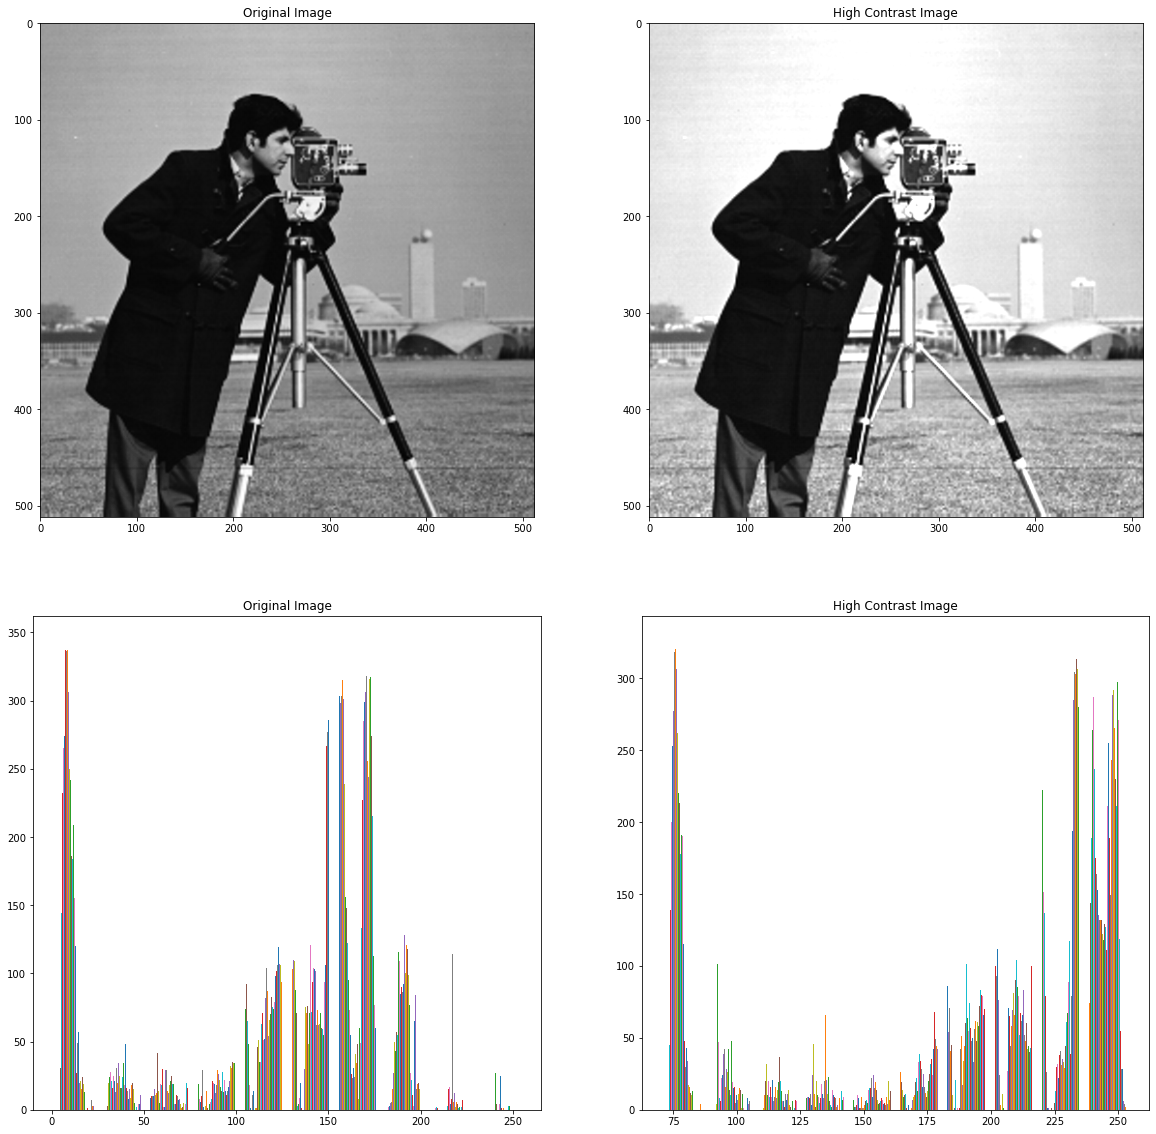

In [10]:
r1,s1=(0,70)
r2,s2=(180,255)
contrast_vc=np.vectorize(contrast_stretch)
img=contrast_vc(r1,s1,r2,s2,img)
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(original, 'gray')

plt.subplot(2,2,2)
plt.title('High Contrast Image')
plt.imshow(img, 'gray') # Repeated executions of this cell will intensify the contrast. 
# Run 1 above cell if 'High Contrast Image' is blank

plt.subplot(2,2,3)
plt.title('Original Image')
plt.hist(original);

plt.subplot(2,2,4)
plt.title('High Contrast Image')
plt.hist(img);

# Bit-Plane Slicing and Intensity-Level Slicing
Both are almost same thing. Bit-Plane concerns pixels with intensity within with 2^exp and Intensity-Level concerns with other intensity values of each pixel

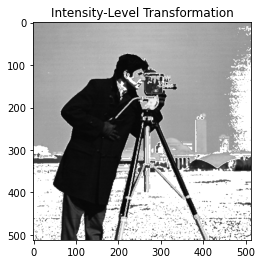

In [11]:
img=data.camera()
h,w=img.shape
for i in range(0,h):
    for j in range(0,w):
        if img[i][j]>=100 and img[i][j]<150:
            img[i][j]=255
plt.title("Intensity-Level Transformation")
plt.imshow(img, 'gray')

Bit-Planes of 8-bit Image -> (0-2<sup>1</sup>), (2<sup>1</sup>-2<sup>2</sup>), (2<sup>2</sup>-2<sup>3</sup>), (2<sup>3</sup>-2<sup>4</sup>), (2<sup>4</sup>-2<sup>5</sup>), (2<sup>5</sup>-2<sup>6</sup>), (2<sup>6</sup>-2<sup>7</sup>), (2<sup>7</sup>-2<sup>8</sup>)

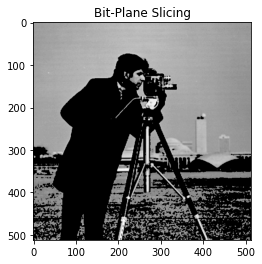

In [12]:
img=data.camera()
h,w=img.shape
for i in range(0,h):
    for j in range(0,w):
        if img[i][j]>=128 and img[i][j]<255:
            pass
        else:
            img[i][j]=0
plt.title('Bit-Plane Slicing')
plt.imshow(img, 'gray')

# Image Histogram Equalization (Both Multi and Single Channel Images)
Sources:<br>
https://ukdevguy.com/histogram-equalization-in-python/ <br>
https://www.youtube.com/watch?v=cVg2WiAX8Lg <br>
Python `lambda`: https://www.w3schools.com/python/python_lambda.asp <br>
Python `map()`: https://www.geeksforgeeks.org/python-map-function/ <br>
`lambda` and `map()` are also explained in next cells

In [202]:
def make_histogram(img):
    """ Take an image and create a historgram from it's luma values """
    if len(img.shape)==3:
        y_vals = img[:,:,0].flatten()
    else:
        y_vals = img.flatten()
    histogram = np.zeros(256, dtype=int)
    for y_index in range(y_vals.size):
        histogram[y_vals[y_index]] += 1
    return histogram

def make_cumsum(histogram):
    """ Create an array that represents the cumulative sum of the histogram """
    cumsum = np.zeros(256, dtype=int)
    cumsum[0] = histogram[0]
    for i in range(1, histogram.size):
        cumsum[i] = cumsum[i-1] + histogram[i]
    return cumsum

def make_mapping(histogram, cumsum, img):
    """ Create a mapping s.t. each old luma value is mapped to a new
        one between 0 and 255. Mapping is created using:
         - M(i) = max(0, round((luma_levels*cumsum(i))/(h*w))-1)
        where luma_levels is the number of luma levels in the image """
    mapping = np.zeros(256, dtype=int)
    luma_levels = 256
    shape=img.shape
    if len(shape)==3:
        IMG_H, IMG_W=(shape[0], shape[1])
    else:
        IMG_H, IMG_W=img.shape
    for i in range(histogram.size):
        mapping[i] = max(0, round((luma_levels*cumsum[i])/(IMG_H*IMG_W))-1)
    return mapping

def apply_mapping(img, mapping):
    """ Apply the mapping to our image """
    new_image = img.copy()
    new_image = np.array(list(map(lambda a : mapping[a], img)), dtype=np.uint8) # Below for details of what happened
        # 'img' value passed to lambda function as 'a', lambda function passed 'a' to mapping[a] and returned it's output.
        # Also, I converted incoming list() to np.array to silence out an error about '__array_interface__'
    return new_image

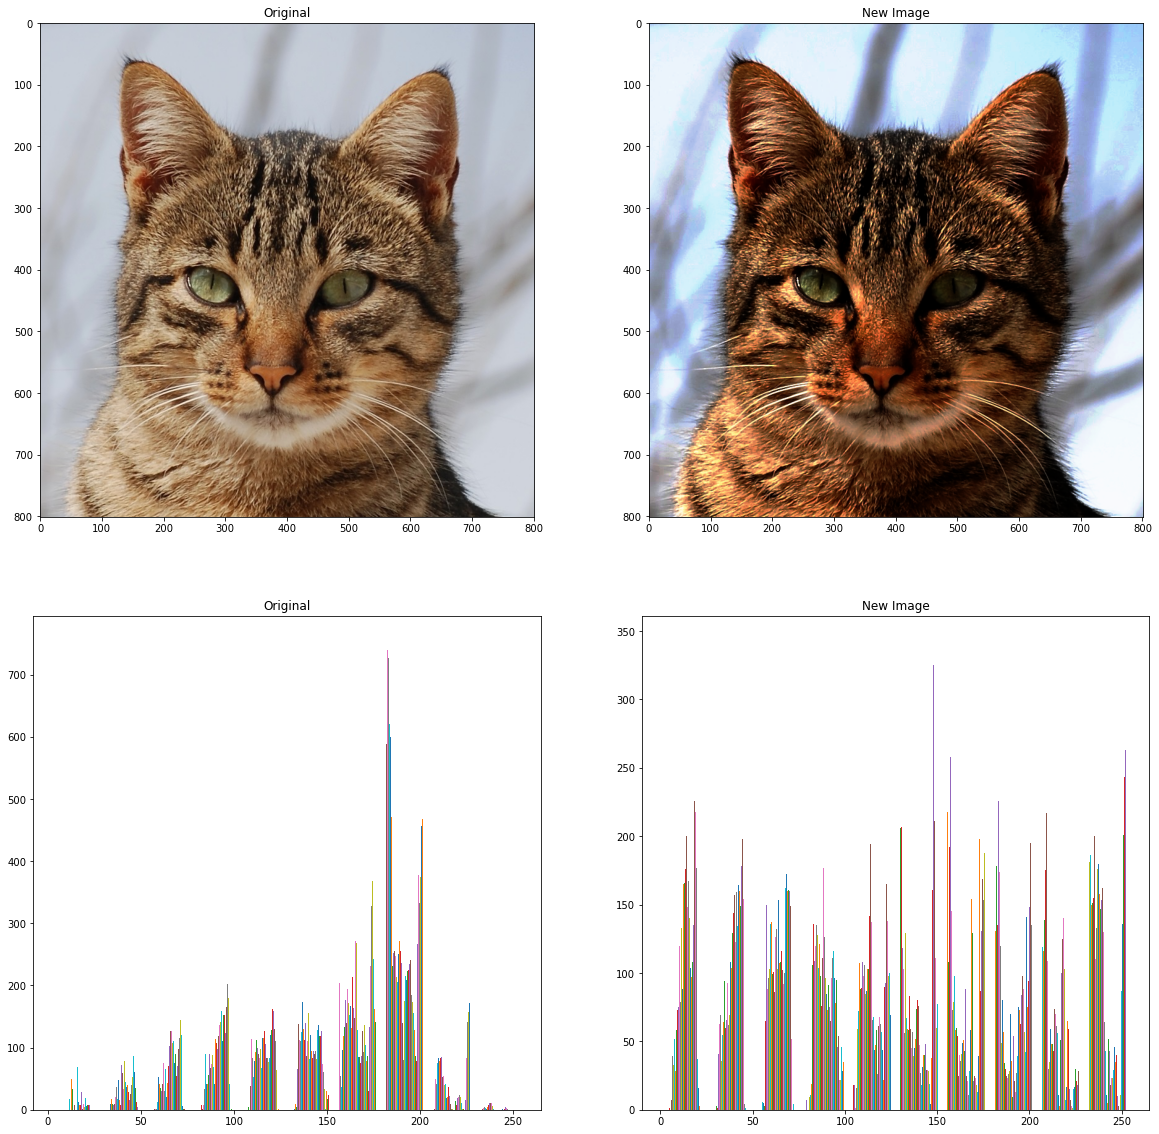

In [201]:
img=Image.open('catpic4.jpg')
img=np.array(img)

# Below statement acts as grey/color image output switch. For color output, comment below line. 
# If inputting grey-scale image, comment below line.
# img=img[:,:,0]

hist=make_histogram(img)
cumsum=make_cumsum(hist)
mapping=make_mapping(hist, cumsum, img)
newImg=apply_mapping(img, mapping)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(img, 'gray')

plt.subplot(2,2,2)
plt.title('New Image')
plt.imshow(newImg, 'gray')
Image.fromarray(newImg).save('HistogramEqualized.jpg')
# Image saved to storage

plt.subplot(2,2,3)
plt.title('Original')
if len(img.shape)==3:
    plt.hist(img[:,:,0]);
else:
    plt.hist(img);

plt.subplot(2,2,4)
plt.title('New Image')
if len(img.shape)==3:
    plt.hist(newImg[:,:,0]);
else:
    plt.hist(newImg);

## Talking about the `map()` and `lambda` used in above cells...
Compare below two cells. They're doing same thing...

<class 'list'>


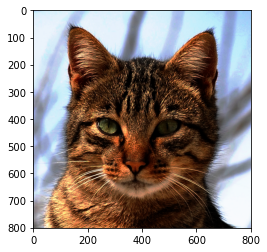

In [194]:
# img=data.camera()

new_img=list(map(lambda a:mapping[a], img))
print(type(new_img))
plt.imshow(new_img, 'gray');

<class 'list'>


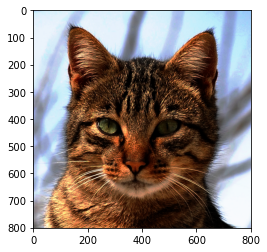

In [195]:
def foo(img):
    out=list()
    inn=list()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            inn.append(mapping[img[i,j]])
        out.append(inn)
        inn=[]
    return out
new_img=foo(img)
print(type(new_img))
plt.imshow(new_img, 'gray');